In [1]:
from Classes import PredictClusters

2024-09-27 15:43:02.534690: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 15:43:02.537558: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 15:43:02.570266: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 15:43:02.570291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 15:43:02.571503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
data_path = "/home/elizahoward/cmspix28-mc-sim/MuC_Output/"
model = PredictClusters(data_directory_path = data_path, labels_directory_path=data_path, tag = '', include_y_local=True)

Directory /home/elizahoward/smart-pixels-ml/ouput/tfrecords_train_6dac4a61 is removed...


Saving batches as TFRecords: 100%|██████████| 57/57 [00:01<00:00, 40.87it/s]


--- Training generator 2.691789150238037 seconds ---
Directory /home/elizahoward/smart-pixels-ml/ouput/tfrecords_validation_6dac4a61 is removed...


Saving batches as TFRecords: 100%|██████████| 57/57 [00:01<00:00, 51.87it/s]


--- Validation generator 2.359407424926758 seconds ---
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 X_input (InputLayer)        [(None, 13, 21, 2)]          0         []                            
                                                                                                  
 q_separable_conv2d (QSepar  (None, 11, 19, 5)            33        ['X_input[0][0]']             
 ableConv2D)                                                                                      
                                                                                                  
 q_activation (QActivation)  (None, 11, 19, 5)            0         ['q_separable_conv2d[0][0]']  
                                                                                                  
 q_conv2d (QConv2D)          (None, 11,

In [3]:
#model.compileModel(learning_rate=0.001)
model.runTraining()
#model.loadWeights("/home/elizahoward/smart-pixels-ml/weights/weightsBIBsigPrediction.hdf5")
#model.loadWeights("/home/elizahoward/smart-pixels-ml/weights/weightsSigPrediction.hdf5")

Epoch 1/50
57/57 [==============================] - 17s 93ms/step - loss: 5891.7075 - val_loss: 4183.1323
Epoch 2/50
57/57 [==============================] - 4s 77ms/step - loss: 3230.8840 - val_loss: 2722.8711
Epoch 3/50
57/57 [==============================] - 5s 79ms/step - loss: 2562.0918 - val_loss: 2404.7644
Epoch 4/50
57/57 [==============================] - 5s 80ms/step - loss: 2339.9702 - val_loss: 2280.1824
Epoch 5/50
57/57 [==============================] - 5s 80ms/step - loss: 2205.1331 - val_loss: 2115.1594
Epoch 6/50
57/57 [==============================] - 5s 86ms/step - loss: 1998.4364 - val_loss: 1851.0276
Epoch 7/50
57/57 [==============================] - 5s 84ms/step - loss: 1730.0707 - val_loss: 1617.5784
Epoch 8/50
57/57 [==============================] - 5s 79ms/step - loss: 1873.6418 - val_loss: 1752.3228
Epoch 9/50
57/57 [==============================] - 5s 82ms/step - loss: 1731.8175 - val_loss: 1619.9983
Epoch 10/50
57/57 [==============================] - 5

In [4]:
model.checkResiduals()

57/57 [==============================] - 3s 45ms/step


100%|██████████| 57/57 [00:02<00:00, 27.50it/s]

Mean and standard deviation of residuals for x-midplane: (8.44314440472301,7.893608183365675)
Mean and standard deviation of residuals for y-midplane: (6.48833690492678,5.063020161059025)
Mean and standard deviation of residuals for cotAlpha: (0.983652048259986,1.3555455047315579)
Mean and standard deviation of residuals for cotBeta: (1.4496213667126354,1.7587645961837564)


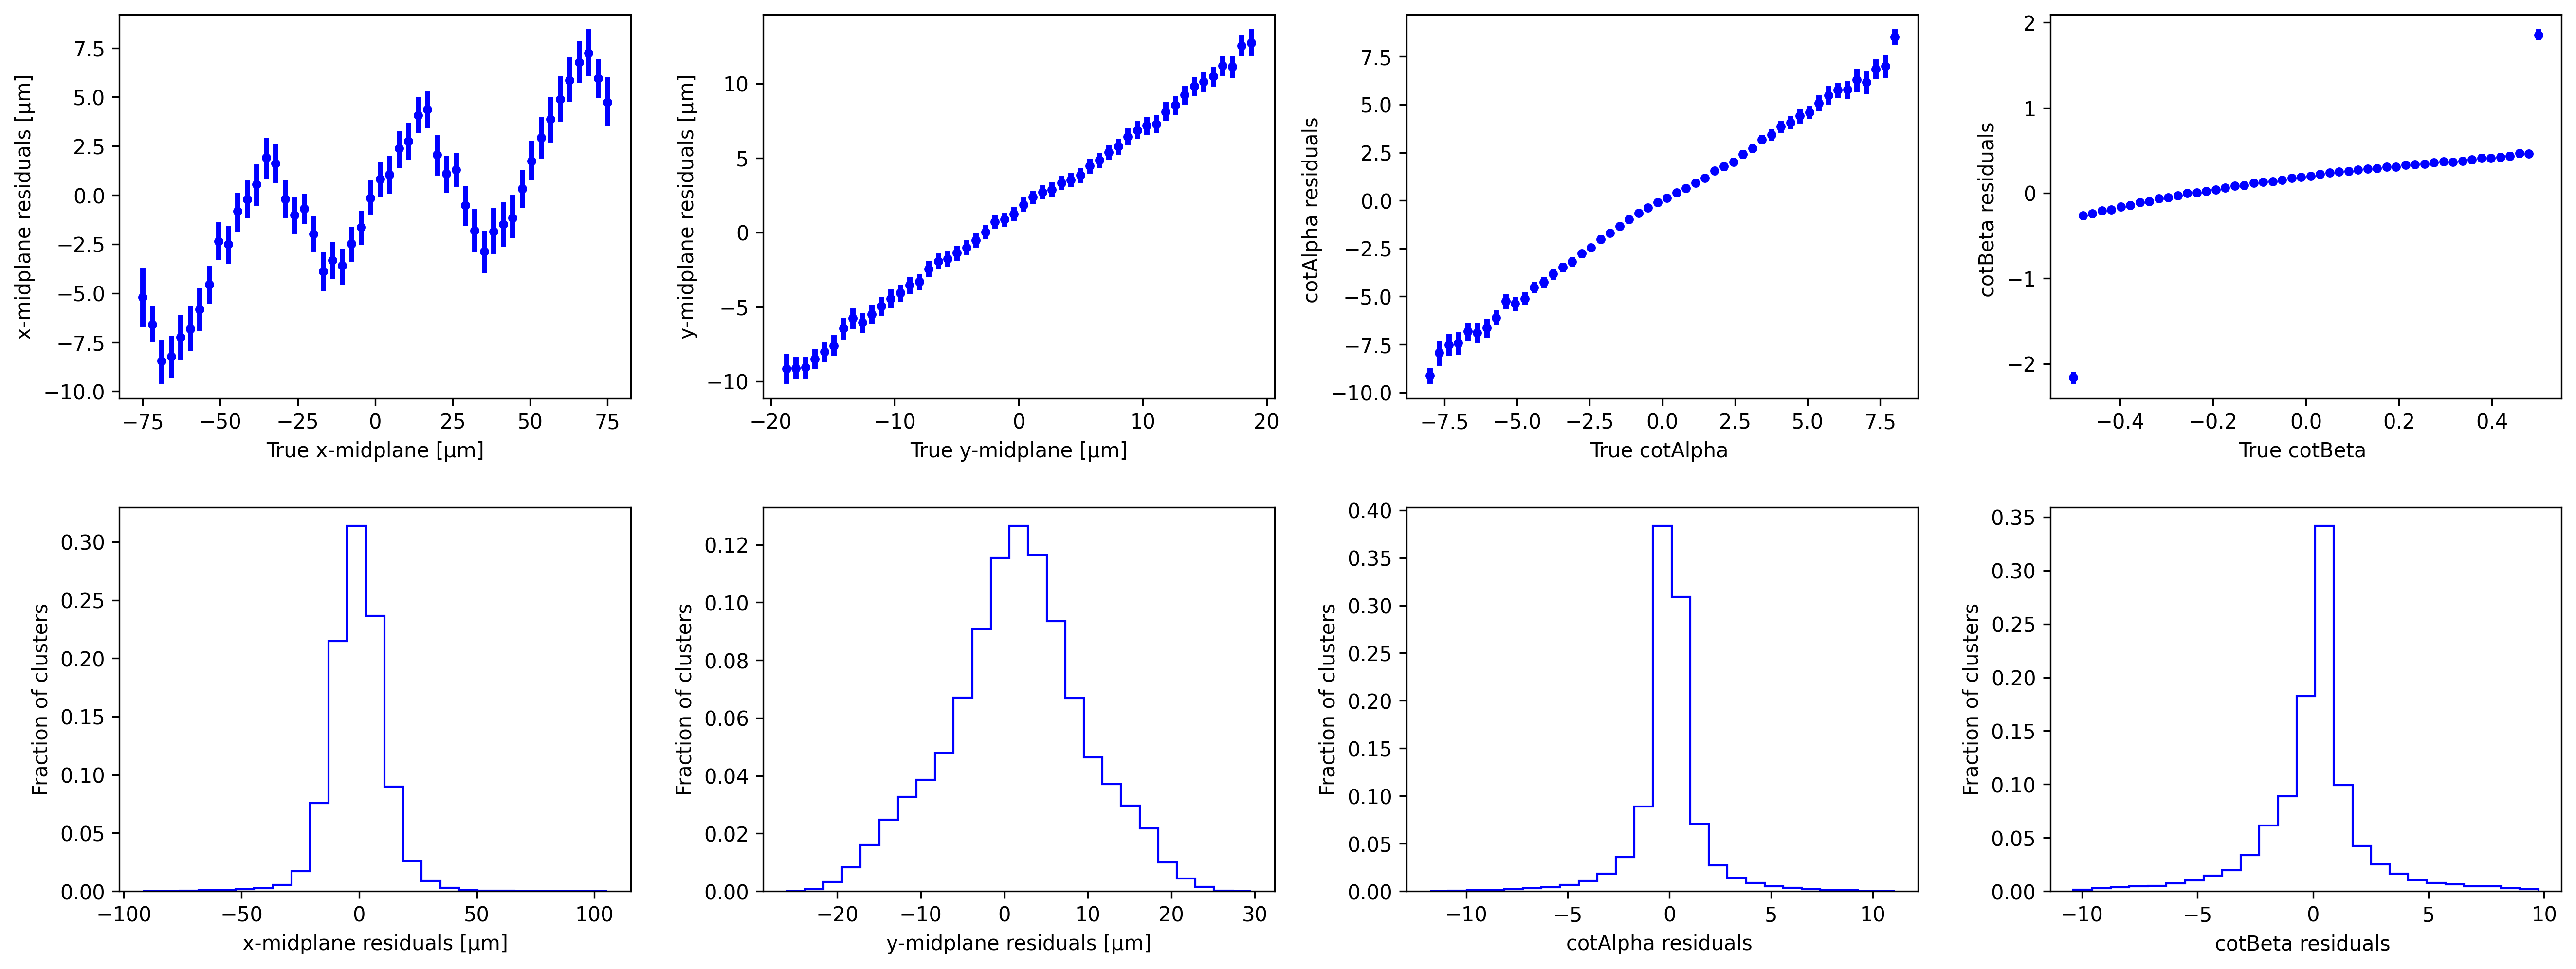

In [5]:
model.plotResiduals()